# Quant Researcher Internship - Test Assignment

## Task 1: Entity Classification

### Load the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('wintermutedata.csv')
uncleaned = pd.DataFrame(data)
print(uncleaned.head()) # Display the first few rows of the dataframe
print(uncleaned.shape) # Display the shape of the dataframe (rows, columns)

                   timestamp                                from_address  \
0  2025-04-08 12:49:57+00:00  0xB1026b8e7276e7AC75410F1fcbbe21796e8f7526   
1  2025-04-08 12:49:54+00:00  0xcDa53B1F66614552F834cEeF361A8D12a0B8DaD8   
2  2025-04-08 12:49:51+00:00  0xb2cc224c1c9feE385f8ad6a55b4d94E92359DC59   
3  2025-04-08 12:49:51+00:00  0x51C72848c68a965f66FA7a88855F9f7784502a7F   
4  2025-04-08 12:49:50+00:00  0x641C00A822e8b671738d32a431a4Fb6074E5c79d   

         from_entity                                  to_address    to_entity  \
0            Camelot  0x51C72848c68a965f66FA7a88855F9f7784502a7F   Wintermute   
1            Uniswap  0x51C72848c68a965f66FA7a88855F9f7784502a7F   Wintermute   
2  Aerodrome Finance  0x51C72848c68a965f66FA7a88855F9f7784502a7F   Wintermute   
3         Wintermute  0x72AB388E2E2F6FaceF59E3C3FA2C4E29011c2D38  PancakeSwap   
4            Uniswap  0x51C72848c68a965f66FA7a88855F9f7784502a7F   Wintermute   

  token        value           usd  \
0  USDC   438.1085

### Clean data

In [3]:
# remove all rows that contain any NaN or empty values
# replace empty strings with NaN and drop rows with NaN values
removed_empty_values = uncleaned.replace('', np.nan).dropna()

# checking the shape after removing rows with NaN values
print(removed_empty_values.shape)

# remove all duplicate rows
removed_duplicate_rows = removed_empty_values.drop_duplicates()

# checking the shape after removing duplicate rows
print(removed_duplicate_rows.shape)

# save the cleaned dataframe to new csv
cleaned = pd.DataFrame(removed_duplicate_rows)
cleaned.to_csv('cleaned_wintermutedata.csv', index=True)

# convert cleaned data to dataframe
df = pd.DataFrame(cleaned)

(375697, 11)
(369333, 11)


### Task 1: Entity Classification

### Create a list of counterparties Wintermute interacted with

In [4]:
#counterparty is an entity on the other side of financial transaction

#go though the from_entity and to_entity columns to extract all entities that have participated with wintermute.

counterparty_to_entity = cleaned.from_entity
counterparty_from_entity = cleaned.to_entity

#join all counterparties and remove duplicates and Wintermute itself
counterparties = pd.concat([counterparty_to_entity, counterparty_from_entity]).unique()
counterparties = counterparties[counterparties != 'Wintermute']

print(f'The unique counterparties that have participated with Wintermute are: {counterparties}')



The unique counterparties that have participated with Wintermute are: ['Camelot' 'Uniswap' 'Aerodrome Finance' 'PancakeSwap' 'Fluid (Instadapp)'
 'CoW Protocol' 'Raydium' 'Orca' 'Meteora (Prev. Mercurial)' 'Phoenix'
 'Binance' 'MetaMask' 'ParaSwap' 'Curve.fi' 'OKX' '0x' 'Coinbase' 'Bybit'
 'LiFi' 'SushiSwap' 'Rizzolver (Wintermute)' 'Bebop' 'Crypto.com'
 'Lifinity' 'Bullish.com' 'Bitstamp' 'Rainbow.me' '@glatebois' 'Gate.io'
 'Backpack Exchange' 'Unizen' 'Bitvavo' 'ShibaSwap' 'Paxos' 'Kraken'
 '1inch' 'The T Resolver (1inch Resolver)' '@eiiriknft' '@larutadeclau'
 'Velodrome Finance' 'Ethena' '@MrBigTimeCEO' '@averagecontract'
 '@shift_cipher' '@quantumEVM18' '@TheCheckedBid33' '@CryptoChamp87'
 '@CipherCraze55' '@NebulaVista99' '@SolsticeVault' '@SolanaSeeker'
 '@BinarySaga_' '@CipherNebulae' '@ec1ipse_sol' 'KuCoin' '@TrueNFT33'
 '@inicola86' 'Bitfinex' '@AnonPartTime' 'Arctic Bastion (1inch Resolver)'
 '@yo_ji12345' 'Coinhako' '@chris900eth' '@RiceFarmerNFT' 'Sky (MakerDAO)'
 'Erick 

### Classify each entity as DeFi or Non-DeFi

In [5]:
# DeFi

defi = ["0x", "1inch", "Aerodrome Finance", "Arctic Bastion (1inch Resolver)" "Bebop", "Camelot", "Circle", "CoW Protocol", 
        "Curve.fi", "Ethena", "Fluid (Instadapp)", "Kyber Network", "Lifi", "Lifinity","MakerDAO", "SushiSwap", "Uniswap", 
        "MetaMask", "Meteora (Prev. Mercurial)", "Orca", "PancakeSwap", "ParaSwap", "Paxos", "Phoenix", "Rainbow.me", 
        "Raydium", "Rizzolver (Wintermute)", "ShibaSwap", "Sky (MakerDAO)", "SushiSwap", "The T Resolver (1inch Resolver)", 
        "Uniswap", "Unizen", "Velodrome Finance"]

# classify non-DeFi entities as all those not in the list above

nondefi = []
for i in range(len(counterparties)):
    if counterparties[i] not in defi:
        nondefi.append(counterparties[i])


# display results

print("These are the DeFi entities:")
for i in defi:
    print(i)

print("\nThese are the non-DeFi entities:")
for i in nondefi:
    print(i)
print("Wintermute")

These are the DeFi entities:
0x
1inch
Aerodrome Finance
Arctic Bastion (1inch Resolver)Bebop
Camelot
Circle
CoW Protocol
Curve.fi
Ethena
Fluid (Instadapp)
Kyber Network
Lifi
Lifinity
MakerDAO
SushiSwap
Uniswap
MetaMask
Meteora (Prev. Mercurial)
Orca
PancakeSwap
ParaSwap
Paxos
Phoenix
Rainbow.me
Raydium
Rizzolver (Wintermute)
ShibaSwap
Sky (MakerDAO)
SushiSwap
The T Resolver (1inch Resolver)
Uniswap
Unizen
Velodrome Finance

These are the non-DeFi entities:
Binance
OKX
Coinbase
Bybit
LiFi
Bebop
Crypto.com
Bullish.com
Bitstamp
@glatebois
Gate.io
Backpack Exchange
Bitvavo
Kraken
@eiiriknft
@larutadeclau
@MrBigTimeCEO
@averagecontract
@shift_cipher
@quantumEVM18
@TheCheckedBid33
@CryptoChamp87
@CipherCraze55
@NebulaVista99
@SolsticeVault
@SolanaSeeker
@BinarySaga_
@CipherNebulae
@ec1ipse_sol
KuCoin
@TrueNFT33
@inicola86
Bitfinex
@AnonPartTime
Arctic Bastion (1inch Resolver)
@yo_ji12345
Coinhako
@chris900eth
@RiceFarmerNFT
Erick @EB7
@IshaanLlc
@bitcocks
@chuddybot
@thesoloistx
BitMart
@Xao

## Task 2: DeFi-Only Analysis

### Filter the dataset to include only transactions where Wintermute interacted with DeFi entities

In [6]:
# obtain all rows where the counterparty is from the DeFi list
from_defi = cleaned.from_entity.isin(defi)
to_defi = cleaned.to_entity.isin(defi)

# Combine with OR and save to new csv
cleaned_defi_data = pd.DataFrame(cleaned.loc[from_defi | to_defi])
cleaned_defi_data.to_csv('clean_defi_only_data.csv', index=True)

### Which coins did they trade the most (volume and frequency)?

In [7]:
# volume is the number of coins traded over a time period, in this case, the time covered by the dataset
volume_by_token = cleaned_defi_data.groupby('token').value.sum().sort_values(ascending=False)

print("TOP COINS BY VOLUME (NUMBER OF COINS TRADED)")
print(volume_by_token.head(10))

# frequency is the count of the number of transactions per token, which is more insightful since for example dogecoin tops
# the volume chart due to the price being very low, but it may not be as frequently traded as other coins like ETH or USDC
frequency_by_token = cleaned_defi_data.token.value_counts()

print("\nTOP COINS BY FREQUENCY (Number of Transactions)")
print(frequency_by_token.head(10))
print(f"\nTotal transactions: {frequency_by_token.sum():,}")

TOP COINS BY VOLUME (NUMBER OF COINS TRADED)
token
BabyDoge    8.302886e+13
Mog         1.433290e+12
PEPE        1.132465e+11
Bonk        6.427996e+10
CAT         2.325998e+10
SHIB        1.883416e+10
WEN         1.668027e+09
APU         6.411919e+08
Neiro       4.533176e+08
USDC        2.895326e+08
Name: value, dtype: float64

TOP COINS BY FREQUENCY (Number of Transactions)
token
USDC     108608
WSOL      96212
WETH      39969
USDT      17011
WBTC      12551
cbBTC      8837
ARB        5168
WBNB       2763
JUP        2432
Bonk       2216
Name: count, dtype: int64

Total transactions: 317,439


We can see that BabyDoge and Mog has the highest volume traded, but in terms of frequency, USDC and WSOL are traded much more often.

### Which coins did they prefer (high activity) vs avoid or use less?

In [8]:
# express top coins by frequency as a percentage of total transactions, this is a good indication of activity
frequency_percentage = (frequency_by_token / frequency_by_token.sum()) * 100
print("\nTOP COINS BY FREQUENCY OF TRANSACTIONS (%)")
print(frequency_percentage.head(10))


TOP COINS BY FREQUENCY OF TRANSACTIONS (%)
token
USDC     34.213817
WSOL     30.308815
WETH     12.591080
USDT      5.358825
WBTC      3.953830
cbBTC     2.783842
ARB       1.628029
WBNB      0.870403
JUP       0.766131
Bonk      0.698087
Name: count, dtype: float64


USDCM, WSOL, and ETH take the majority proportion of transactions, indicating a preference for these coins due to high activity. 

### Which blockchains they are most active on

In [9]:
# count the number of transactions per blockchain
blockchain_activity = cleaned_defi_data.chain.value_counts()
blockchain_percentage = (blockchain_activity / blockchain_activity.sum()) * 100
print("\nBLOCKCHAIN ACTIVITY (Number of Transactions)")
print(blockchain_percentage)


BLOCKCHAIN ACTIVITY (Number of Transactions)
chain
solana          63.831791
arbitrum_one    20.564581
base             6.404065
ethereum         5.863804
bsc              2.302175
optimism         1.033269
polygon          0.000315
Name: count, dtype: float64


Solana overwhelmingly is the blockchain Wintermute is most active on, taking more than 3 times the number of transactions compared to Ethereum which is second for number of blockchain transactions. Base and Ethereum are greatest of the rest. 

### Which DeFi platforms they interact with the most

In [10]:
# count the number of transactions with each DeFi platform
from_counts = cleaned_defi_data.from_entity.value_counts()
to_counts = cleaned_defi_data.to_entity.value_counts()

# Combine the counts
defi_platform_activity = from_counts.add(to_counts, fill_value=0)

# Calculate percentages
# We must multiply by 2 because each transaction involves two entities, one of which is Wintermute.
# Thus we get the percentage of transactions a DeFi platoform is involved in
defi_platform_percentage = (defi_platform_activity / defi_platform_activity.sum()) * 100 * 2

print("\nDEFI PLATFORM ACTIVITY (Percentage of Transactions DeFi Platform is Involved In)")
print(defi_platform_percentage.sort_values(ascending = False))


DEFI PLATFORM ACTIVITY (Percentage of Transactions DeFi Platform is Involved In)
Wintermute                         100.000000
Orca                                26.156836
Raydium                             25.745734
Uniswap                             15.752948
Meteora (Prev. Mercurial)            9.853547
PancakeSwap                          6.660177
Fluid (Instadapp)                    4.292793
Camelot                              3.286931
Aerodrome Finance                    2.785102
Phoenix                              1.943996
MetaMask                             0.739670
Velodrome Finance                    0.726439
CoW Protocol                         0.670050
ParaSwap                             0.485133
Curve.fi                             0.267768
Rizzolver (Wintermute)               0.252647
Lifinity                             0.131679
0x                                   0.114353
SushiSwap                            0.085056
Rainbow.me                           0.01260

As we would expect, Wintermute is involved in all of the transactions. Orca and Raydium interact most with Wintermute in terms of transaction count, taking about 50% of the total transactions in total. 

### Are there temporal trends in their DeFi activity?

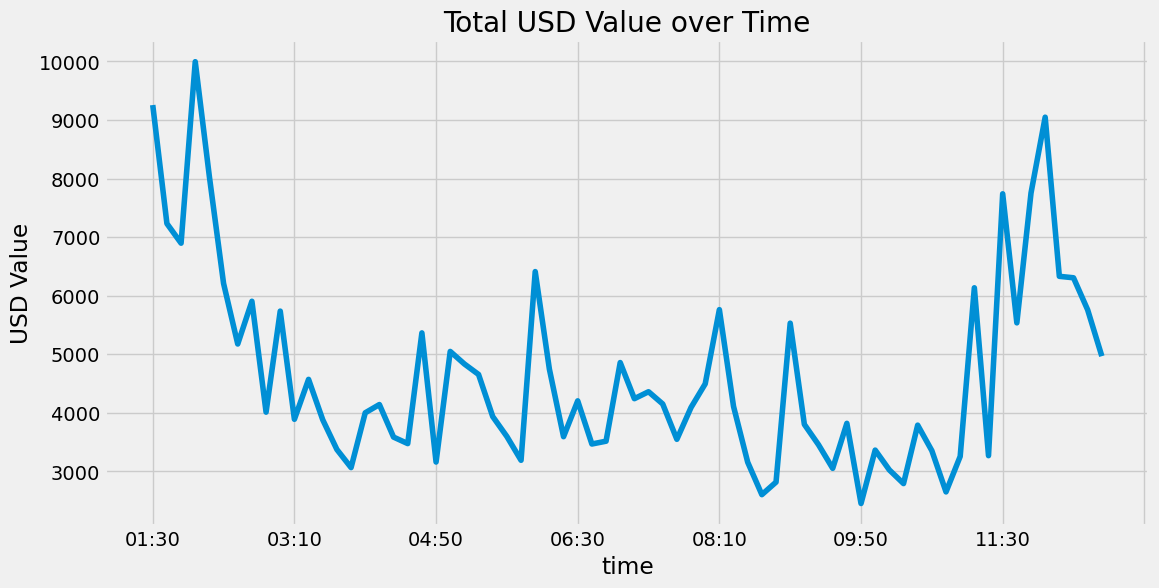

In [11]:
# Extract time strings and keep as a column. Each time has been rounded down to the nearest 10 minutes.
cleaned_defi_data['time'] = cleaned_defi_data['timestamp'].str[11:15] + '0'

usd_per_10_minutes = cleaned_defi_data['usd'].groupby(cleaned_defi_data['time']).count()

# Set the time column as index
cleaned_defi_data = cleaned_defi_data.set_index('time')

# Plot
plt.style.use('fivethirtyeight')
usd_per_10_minutes.plot(kind='line', figsize=(12,6), title='Total USD Value over Time')

plt.ylabel('USD Value')
plt.show()

This graph shows that DeFi activity measured by USD value and number of coins traded within a 10 minute window decreases from 1:30 to around 3, then fluctuates around this level until after 10 where there is a spike in activity

## Task 3: Exploratory Data Analysis (EDA)

In order to gain insight into the temporal trend of DeFi over the time period provided, have already done some EDA. See above for a time series graph showing DeFi activity in terms of USD value traded within 10 minute intervals.

I would also like to make a bar chart of the top 7 blockchains traded by transaction frequency and average usd value per transaction to visualize which coins are most actively traded in DeFi over this time period and on average which blockchain has highest usd value. I also calculate and plot the standard devation in average usd value. 

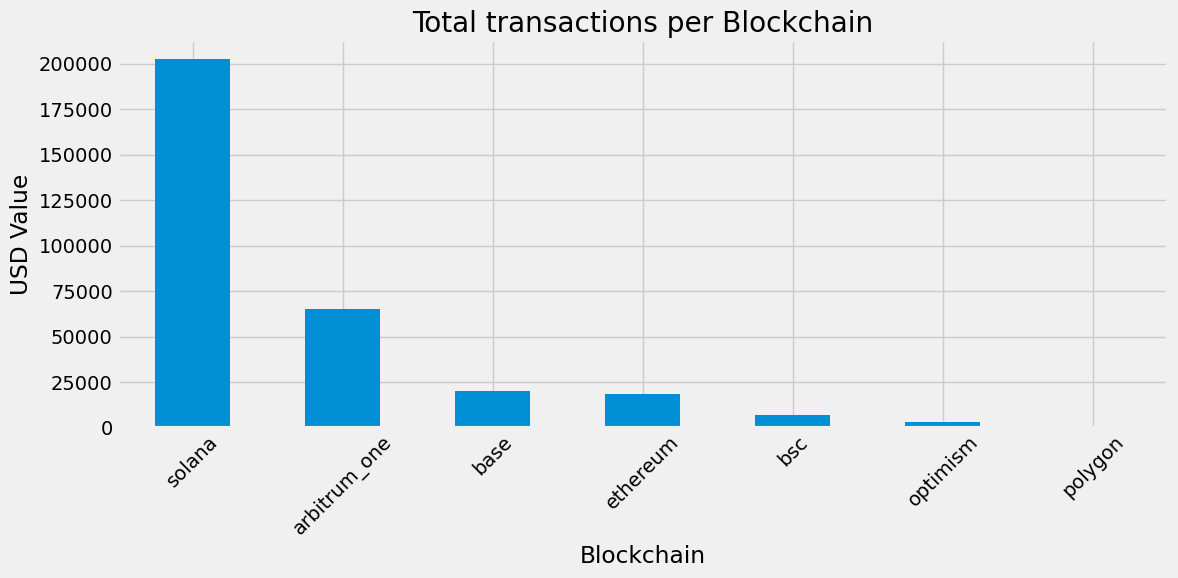

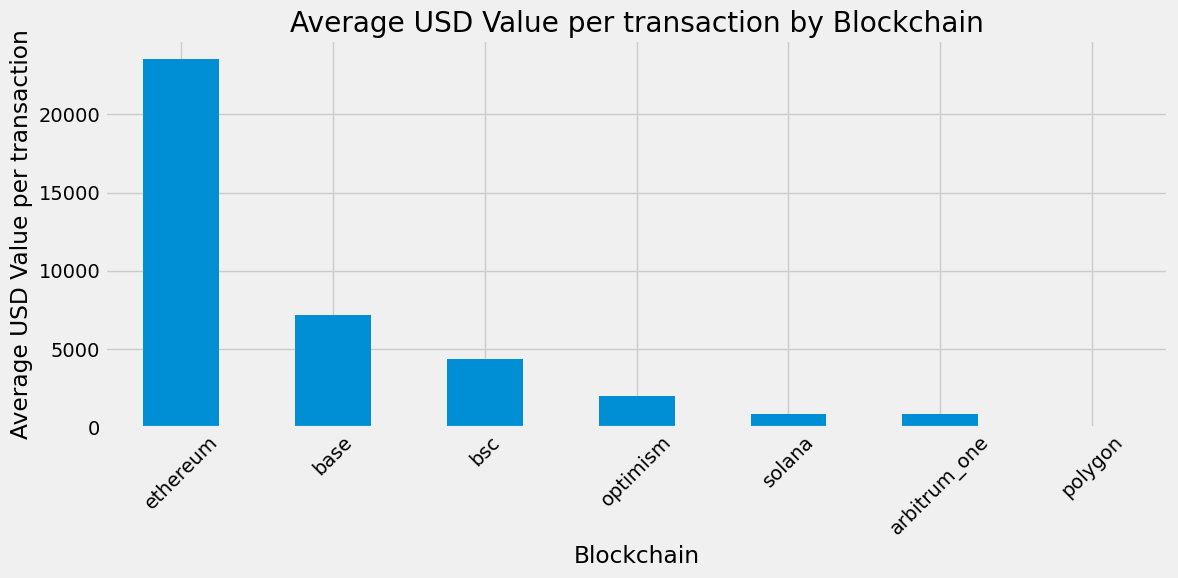

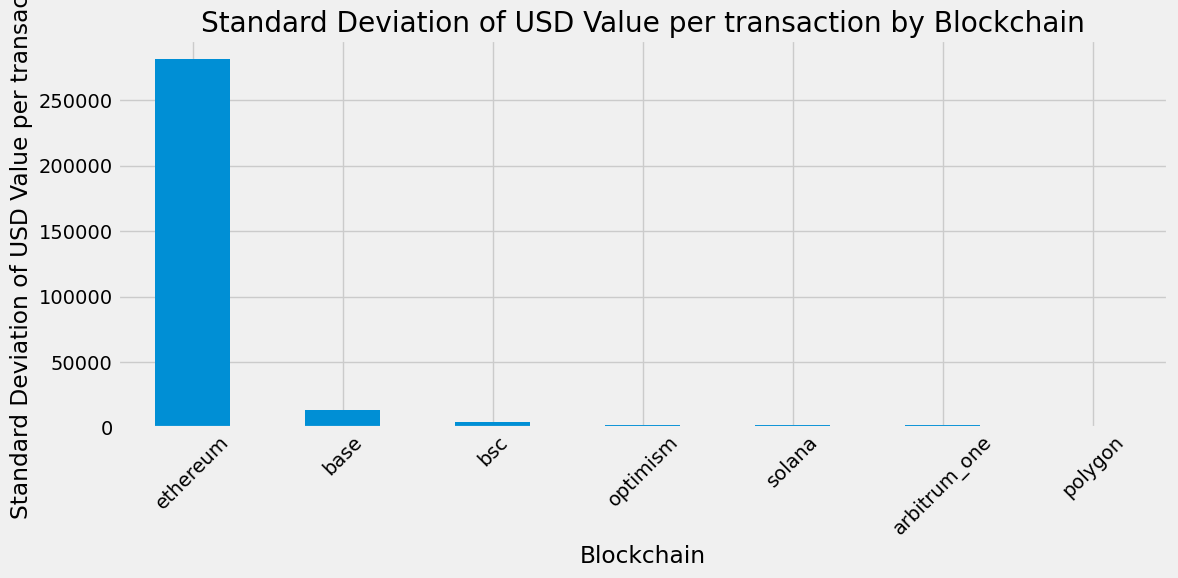

In [20]:
# blockchain_activity = cleaned_defi_data.chain.value_counts() as defined above
# 

blockchain_coins_traded = cleaned_defi_data.groupby('chain').value.sum()
blockchain_usd_value = cleaned_defi_data.groupby('chain').usd.sum()
frequency_by_blockchain = cleaned_defi_data.chain.value_counts()
average_value_per_transaction = blockchain_usd_value / frequency_by_blockchain


# Vertical bar chart of blockchain activity by total USD value traded
plt.figure(1)
blockchain_activity.plot(kind='bar', figsize=(12, 6))
plt.ylabel('USD Value')
plt.xlabel('Blockchain')
plt.title('Total transactions per Blockchain')
plt.xticks(rotation=45)
plt.tight_layout()

# Vertical bar chart of blockchain activity by total USD value traded
plt.figure(2)
average_value_per_transaction.sort_values(ascending=False).head(7).plot(kind='bar', figsize=(12, 6))
plt.ylabel('Average USD Value per transaction')
plt.xlabel('Blockchain')
plt.title('Average USD Value per transaction by Blockchain')
plt.xticks(rotation=45)
plt.tight_layout()

# bar chart of standard devation of average usd value per transaction by blockchain
plt.figure(3)
stddev_value_per_transaction = cleaned_defi_data.groupby('chain').usd.std()
stddev_value_per_transaction.sort_values(ascending=False).head(7).plot(kind='bar', figsize=(12, 6))
plt.ylabel('Standard Deviation of USD Value per transaction')
plt.xlabel('Blockchain')
plt.title('Standard Deviation of USD Value per transaction by Blockchain')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()